In [ ]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import os

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/globalterrorism.csv', encoding='ISO-8859-1')

In [ ]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
dataset.describe

<bound method NDFrame.describe of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       1.970000e+11   1970       7     2        NaN         0        NaN   
1       1.970000e+11   1970       0     0        NaN         0        NaN   
2       1.970010e+11   1970       1     0        NaN         0        NaN   
3       1.970010e+11   1970       1     0        NaN         0        NaN   
4       1.970010e+11   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  2.017120e+11   2017      12    31        NaN         0        NaN   
181687  2.017120e+11   2017      12    31        NaN         0        NaN   
181688  2.017120e+11   2017      12    31        NaN         0        NaN   
181689  2.017120e+11   2017      12    31        NaN         0        NaN   
181690  2.017120e+11   2017      12    31        NaN         0        NaN   

        country         country_txt  regi

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [ ]:
dataset.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
dataset.rename(columns={'iyear':'year' , 'imonth':'month' ,'iday':'day','country_txt':'country','attacktype1_txt':'attacktype','targtype1_txt':'targtype','targsubtype2':'targsubtype2', 'gname':'group_name','weaptype1_txt':'weaptype','dbsource':'source','region_txt':'region','nkill':'Killed','nwound':'Wounded','weapdetail':'weapondetail','natlty1_txt':'nationality'} , inplace=True)

In [ ]:
dataset.head(20)

,eventid,year,month,day,approxdate,extended,resolution,country,country,region,...,addnotes,scite1,scite2,scite3,source,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,1.970010e+11,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [ ]:
nationu= dataset[dataset['nationality'] != 'Unknown']
nationtype=nationu['nationality'].value_counts().reset_index()

In [ ]:
nationtype

,index,nationality
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [ ]:
nationtype.rename(columns={"index":'Nation',"nationality":'Count'},inplace=True)
nationtype

,Nation,Count
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [ ]:
dataset['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [ ]:
nameu= dataset[dataset['group_name'] != 'Unknown']
nametype=nameu['group_name'].value_counts().reset_index()
nametype

,index,group_name
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [ ]:
nametype.rename(columns={"index":'Groupname',"group_name":'Counts'},inplace=True)
nametype

,Groupname,Counts
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [ ]:
cityu= dataset[dataset['city'] != 'Unknown']

In [ ]:
citytype=cityu['city'].value_counts().reset_index()
citytype

,index,city
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Hotwag,1
36669,Ostend,1
36670,Balughata,1
36671,Jikoyi,1


In [ ]:
citytype.rename(columns={"index":'City','city':'Count'},inplace=True)
citytype

,City,Count
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Hotwag,1
36669,Ostend,1
36670,Balughata,1
36671,Jikoyi,1


In [ ]:
weaponu=dataset[dataset['weaptype'] != 'Unknown']
weapontype=weaponu['weaptype'].value_counts().reset_index()
weapontype

,index,weaptype
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35
9,Fake Weapons,33


In [ ]:
weapontype.rename(columns={"index":'Weapontype','weaptype':'Count'},inplace=True)
weapontype

,Weapontype,Count
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35
9,Fake Weapons,33


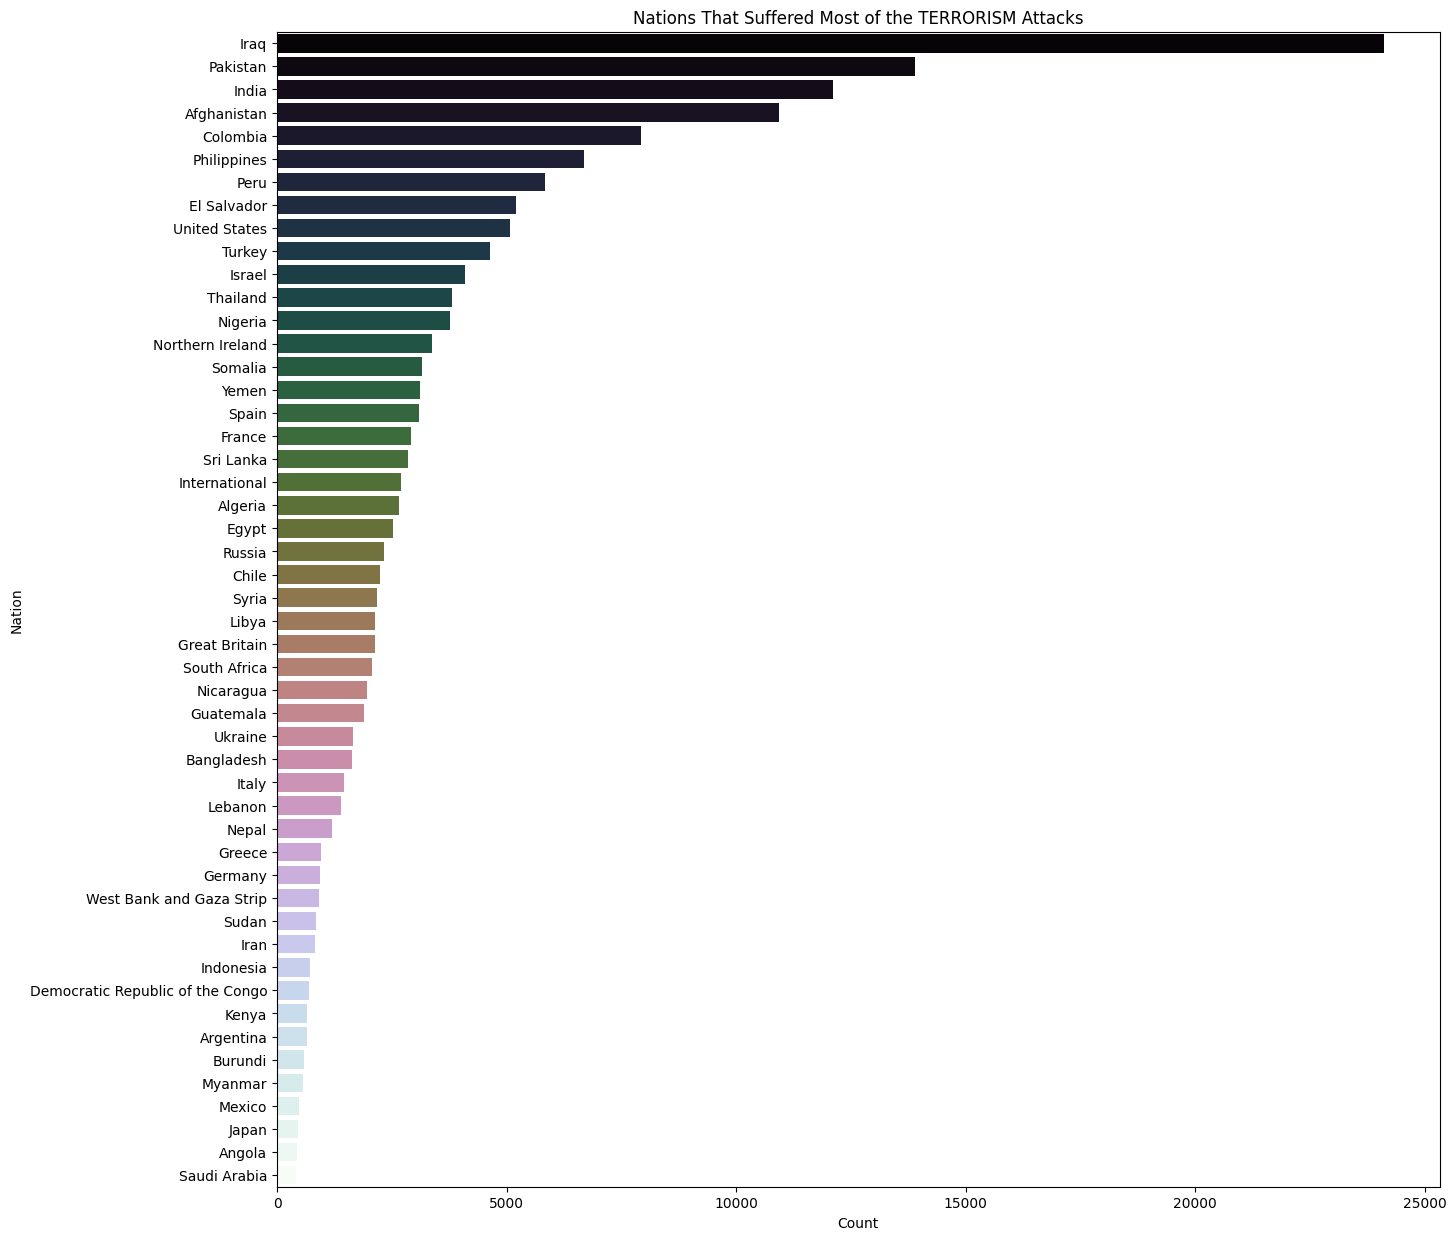

In [ ]:
f,ax = plt.subplots(figsize=(15,15))
ax = sns.barplot(x="Count", y="Nation", data=nationtype[0:50],
                 palette="cubehelix").set_title('Nations That Suffered Most of the TERRORISM Attacks')

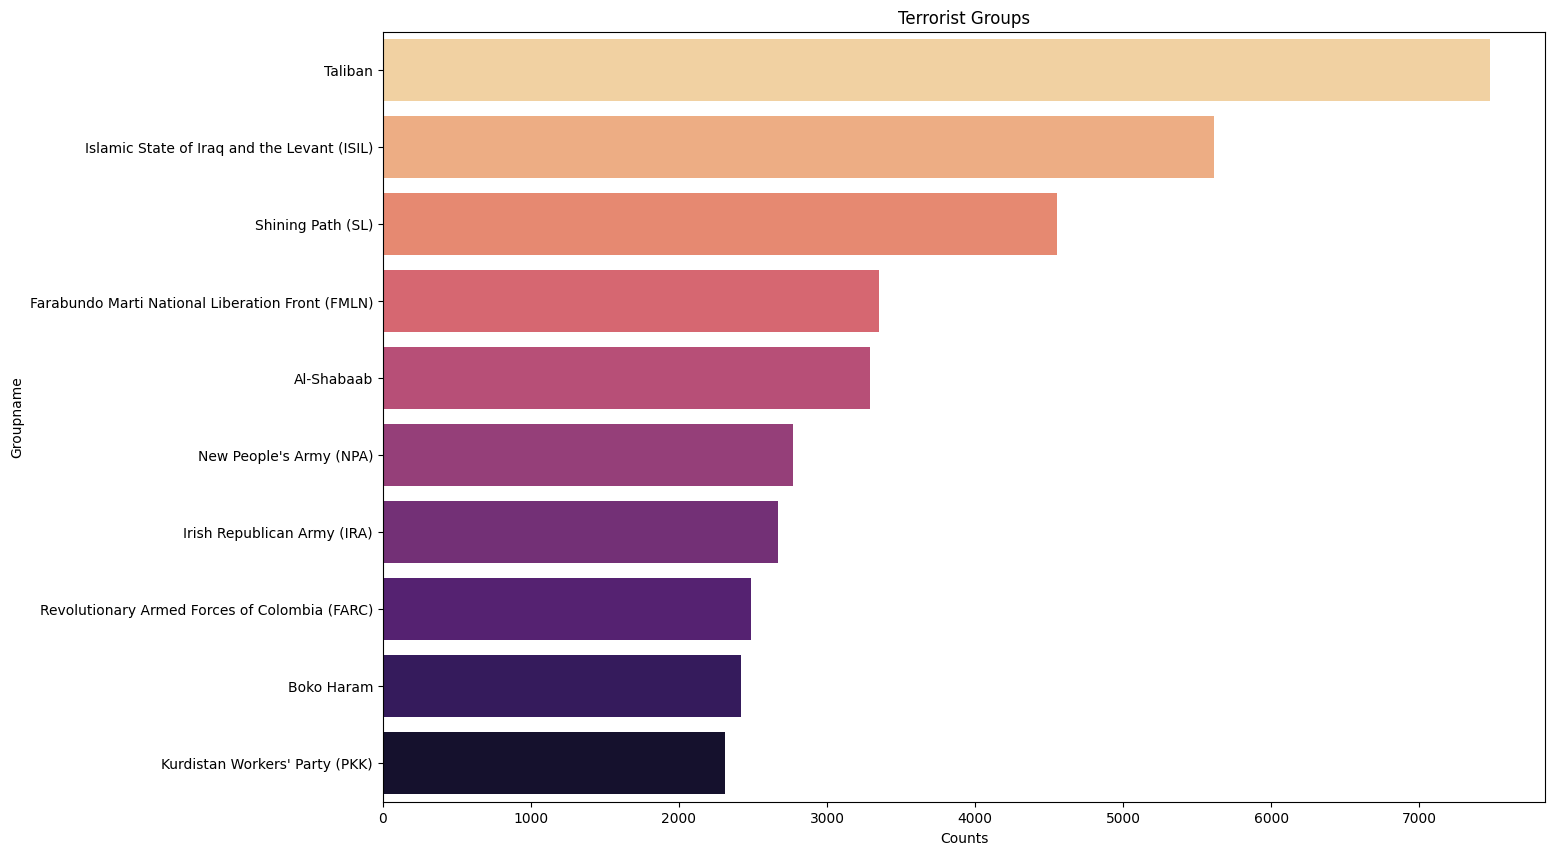

In [ ]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Groupname", data=nametype[:10],
                 palette="magma_r").set_title('Terrorist Groups')

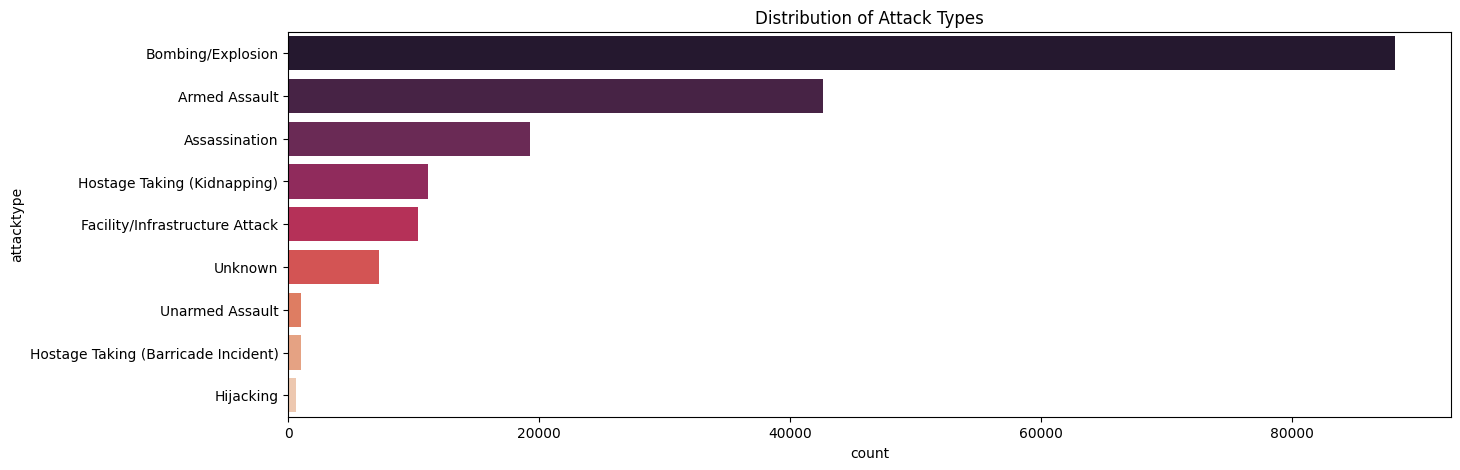

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, y='attacktype', order=dataset['attacktype'].value_counts().index, palette='rocket')
plt.title('Distribution of Attack Types')
plt.show()

In [ ]:
plt.figure(figsize=(5,5))
target_counts = dataset['targtype'].value_counts()
colors = [
    "#000004", "#070b39", "#1c1e6d", "#414387", "#5a60a0",
    "#7577b9", "#8f8fcc", "#a9a8e6", "#c4c6f1", "#dfdffa",
    "#f1ebf6", "#f9f4f8", "#fbebf5", "#f9dbdb", "#f4bccf",
    "#ec90c7", "#e763bc", "#dD3497", "#d7306e", "#ae0e36"]

<Figure size 500x500 with 0 Axes>

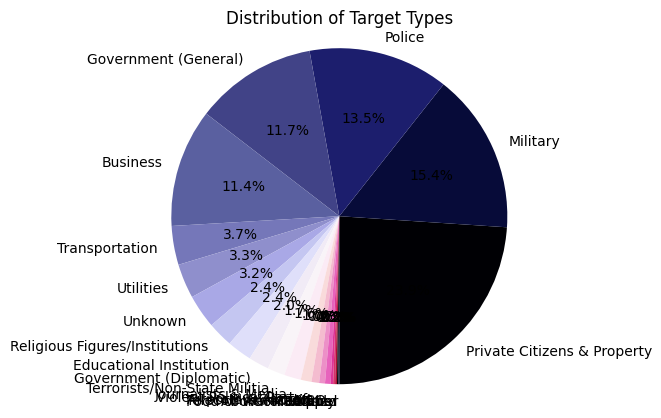

In [ ]:
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=270, colors=colors)
plt.axis('equal')
plt.title('Distribution of Target Types')
plt.show()

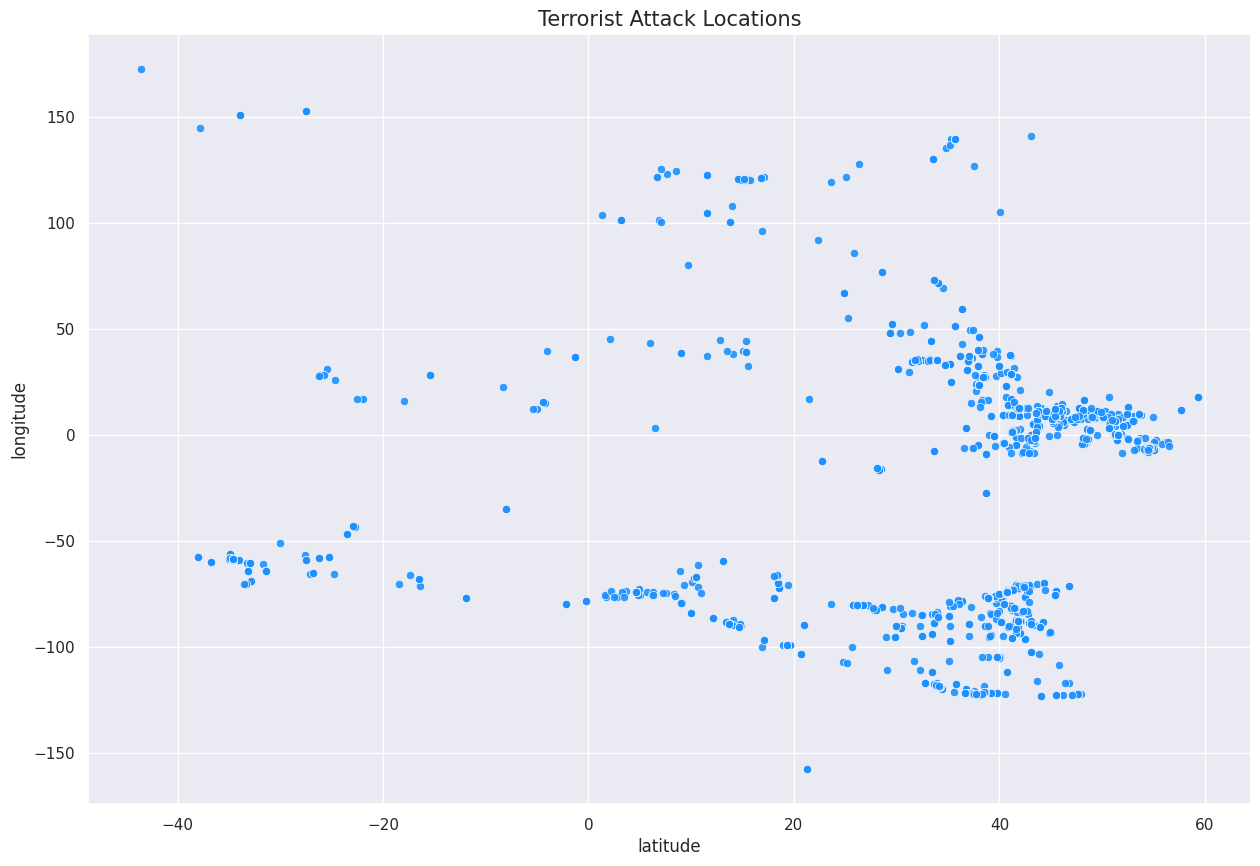

In [81]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.scatterplot(x = "latitude",y = "longitude",data=dataset[0:5000],alpha=0.9,color='dodgerblue')
plt.title('Terrorist Attack Locations',fontsize=15)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()

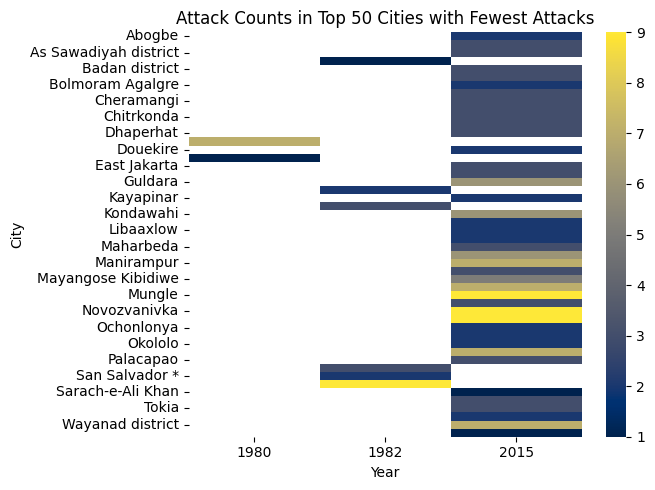

In [68]:
plt.figure(figsize=(7, 5))
top_cities = dataset['city'].value_counts().nsmallest(50).index
subset = dataset[dataset['city'].isin(top_cities)]
heatmap_data = subset.pivot_table(index='city', columns='year', values='attacktype1', aggfunc='sum')

sns.heatmap(heatmap_data, cmap="cividis")

plt.title("Attack Counts in Top 50 Cities with Fewest Attacks")
plt.xlabel("Year")
plt.ylabel("City")
plt.tight_layout()

plt.show()

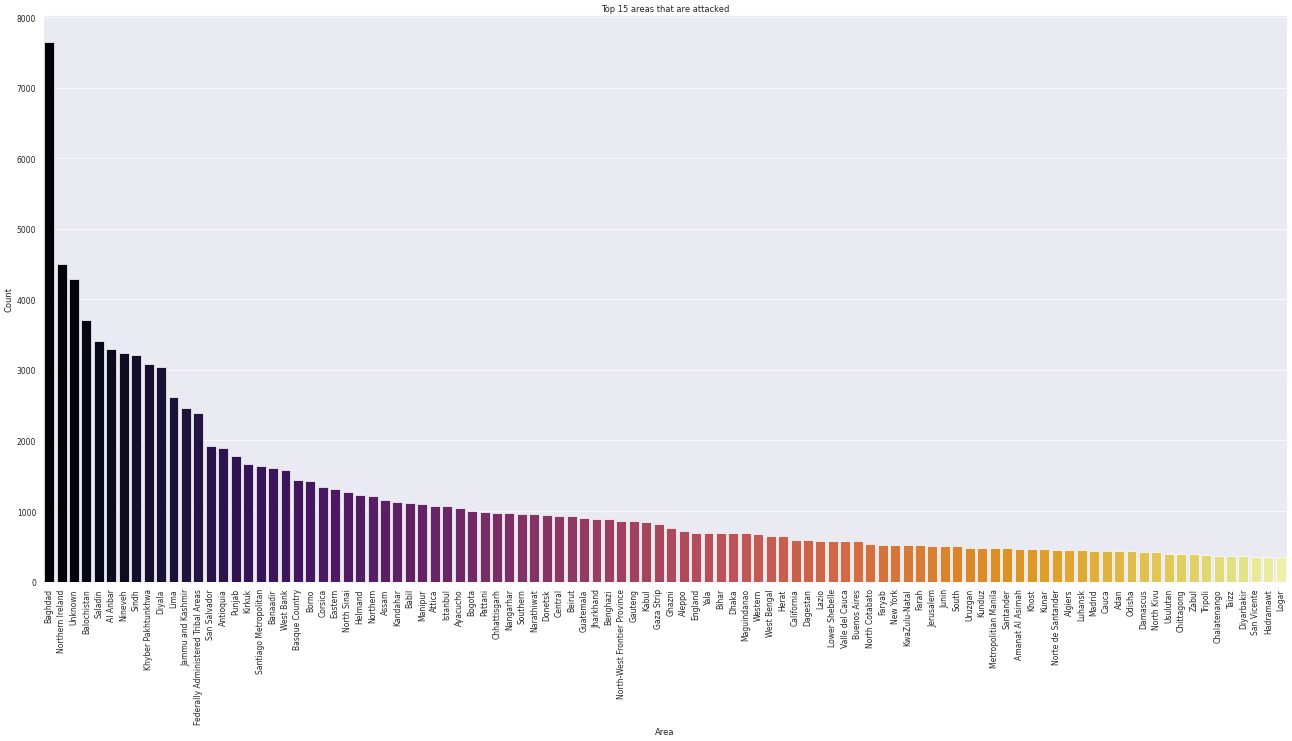

In [104]:
plt.figure(figsize=(26,15), dpi=50)

sns.barplot(
    x=dataset['provstate'].value_counts()[:100].index,
    y=dataset['provstate'].value_counts()[:100].values,
    palette="inferno")
plt.title("Top areas that are attacked")
plt.xlabel("Area")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()